In [1]:
import skimage
import numpy
import sys
import scipy
from skimage import io,util,color
from scipy import ndimage

import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display, clear_output

import matplotlib.pyplot as plt

%matplotlib inline

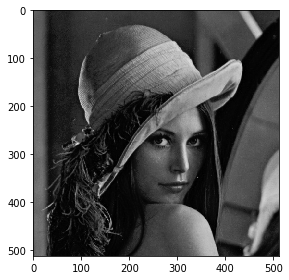

In [2]:
im = util.img_as_float(io.imread("/home/jim-alexander/Dokumenter/bildebehandling/Bilder/image_resources/lenna-RGB.tif",as_gray=True))
io.imshow(im, cmap='gray')
io.show()

In [3]:
def smooth(image, sigma):
    # Read in image and convert to appropriate format
    #image = util.img_as_float(color.rgb2gray(io.imread(image)))

    # Read in sigma 
    sigma = float(sigma)

    # Calculate size of filter mask
    size = int(6*sigma)-1

    # A function for converting top-left aligned coordinates to center aligned 
    # coordinates
    def dist(i,j):
      # Find the center index
      center = size//2
      # Return the converted coordinates
      return (i-center,j-center) 

    # A function for creating a Gaussian smoothing filter
    def gaussian():
      # Create the filter image
      mask = numpy.ndarray((size,size), dtype=numpy.float) 

      # Calculate the constant factor of the Gaussian equation. Not needed if we
      # are normalizing the filter after calculations
      constant = 1/(2*numpy.pi*sigma**2)

      # Loop through all the pixels of the mask
      for i in range(0,size):
        for j in range(0,size):
          # Find the center-aligned coordinates for the current pixel
          x,y = dist(i,j)
          # Calculate the pixel value 
          mask[i,j] = constant * numpy.exp(-(x**2 + y**2)/(2*sigma**2))


      return mask

    # Create the Gaussian filter
    gaussian_filter = gaussian()

    # Smooth the image using built-in convolution operator and our filter
    smooth = ndimage.convolve(image, gaussian_filter, mode="nearest")

    return smooth

def laplacian(image):
    laplacian_filter = numpy.asarray([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    return ndimage.convolve(image, laplacian_filter, mode="nearest")

def zeroCrossPair(pixel1,pixel2):
    if(pixel1*pixel2 < 0):
        return abs(pixel1 - pixel2)
    else:
        return 0

def zeroCrossing3x3(subim, tresh):
    ret = 0
    for x in range(3):
        ret += zeroCrossPair(subim[0,x],subim[2,2-x]) 
    ret += zeroCrossPair(subim[1,0],subim[1,2]) 
    return ret

def zeroCrossing(image,tresh):
    height,width = image.shape
    ret = numpy.zeros(image.shape, dtype=bool)
    for i in range(1,height-1):
        for j in range(1,width-1):
            subim = image[i-1:i+2,j-1:j+2]
            ret[i,j] = zeroCrossing3x3(subim,tresh)
    return ret > tresh

def update(sigma,tresh):
    im = util.img_as_float(io.imread("/home/jim-alexander/Dokumenter/bildebehandling/Bilder/image_resources/lenna-gray.tif",as_gray=True))
    io.imshow(zeroCrossing(laplacian(smooth(im,sigma)),tresh),cmap='gray')
    io.show()
    
interactive(update, sigma=(1.0,5.0), tresh=widgets.FloatSlider(min=0,max=1,value=0.025,step=0.001))

interactive(children=(FloatSlider(value=3.0, description='sigma', max=5.0, min=1.0), FloatSlider(value=0.025, …